# SQL 문법

* 교재와 동일한 환경을 위해 MySQL사용
* **MySQL 실행키 변경**: http://web.adamelixir.link/Board/ViewBoardDetail.aspx?idx=101
* main_menu.xml 파일을 열어서  id가 com.mysql.wb.menu.query.exec인 것을 찾은 후, shortcut인 부분이 Modifier+Shift+Return으로 되어있는것을 변경한다.

## 1. 데이터베이스 만들기

* SQL 스크립트에서 하이픈(-)2개가 연속되면, 주석으로 사용할 수 있음

### 숫자를 자동으로 입력해주는 실행어
* 순번을 직접 입력할 필요없이 1, 2, 3, ... 과 같은 방식으로 자동 증가

* **MySQL**: AUTO_INCREMENT
* **MS-SQL(SQL Server)**: IDENTITY(초기값, 증가값)[제약조건]
* **Oracle**: MINVALUE 1 \ 
START WITH  \ 
INCREMENT BY \ 1
CACHE 10

#### SQL_SERVER상에서 오류: 테이블 'buy'에 있는 ID 열의 명시적 값은 열 목록이 사용되고 IDENTITY_INSERT가 ON일 때만 지정할 수 있습니다.
* 해결: SET IDENTITY_INSERT buy ON의 명령문 추가 이후 INSERT 구문 추가
* 테이블에 데이터 추가를 완료했다면 SET IDENTITY_INSERT buy OFF로 닫아주어야 문제가 발생하지 않는다.

In [ ]:
DROP DATABASE IF EXISTS market_db; -- 만약 market_db가 존재하면 우선 삭제한다.
CREATE DATABASE market_db;
USE market_db;
CREATE TABLE member -- 회원 테이블
( mem_id  		CHAR(8) NOT NULL PRIMARY KEY, -- 사용자 아이디(PK)
  mem_name    	VARCHAR(10) NOT NULL, -- 이름
  mem_number    INT NOT NULL,  -- 인원수
  addr	  		CHAR(2) NOT NULL, -- 지역(경기,서울,경남 식으로 2글자만입력)
  phone1		CHAR(3), -- 연락처의 국번(02, 031, 055 등)
  phone2		CHAR(8), -- 연락처의 나머지 전화번호(하이픈제외)
  height    	SMALLINT,  -- 평균 키
  debut_date	DATE  -- 데뷔 일자
);
CREATE TABLE buy -- 구매 테이블
(  num 		INT IDENTITY NOT NULL PRIMARY KEY, -- 순번(PK)
   mem_id  	CHAR(8) NOT NULL, -- 아이디(FK)
   prod_name 	CHAR(6) NOT NULL, --  제품이름
   group_name 	CHAR(4)  , -- 분류
   price     	INT  NOT NULL, -- 가격
   amount    	SMALLINT  NOT NULL, -- 수량
   FOREIGN KEY (mem_id) REFERENCES member(mem_id)
);


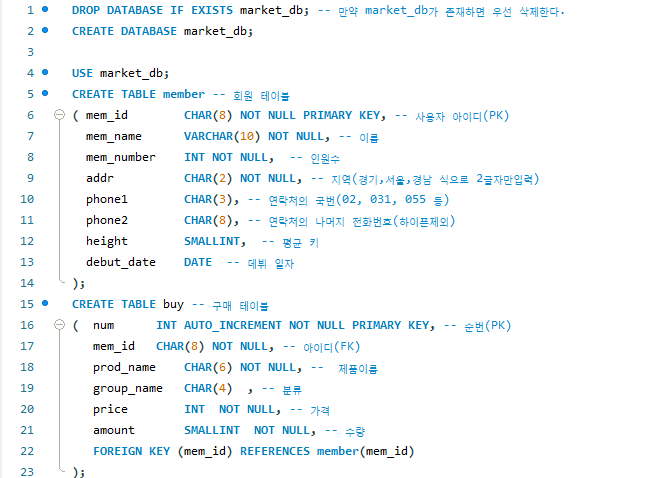

* member 테이블

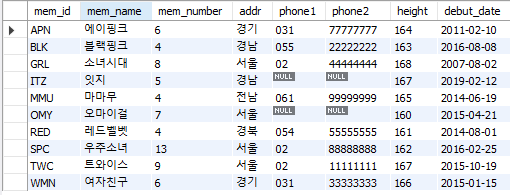

* buy 테이블

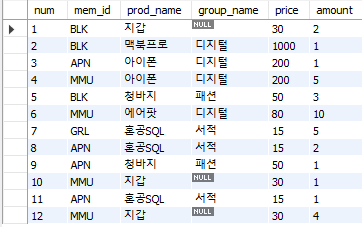

## 2. 기본 문법

### USE문

* SELECT문을 실행하기 전, 먼저 사용할 데이터베이스를 지정해야 함.
* USE 데이터베이스_이름;
* 다시 USE문을 사용하거나, 다른 DB를 사용하겠다고 명시하지 않으면 앞으로 모든 SQL문은 market_db에서 수행됨
* MySQL 워크벤치를 재시작하거나 쿼리 창을 새로 열면 다시 USE를 실행해야 함

### SELECT문

* SELECT 열_이름 FROM 테이블_이름 WHERE 조건식 GROUP_BY 열_이름 HAVING 조건식 ORDER BY  열_이름 LIMIT 숫자
* 기본적으로 SELECT 열_이름 FROM 테이블_이름 WHERE 조건식 의 형태를 지님
* 모든것을 의미, '*'가 사용된 위치가 열 이름이 나온곳 -> 모든 열을 의미함, 교재에서는 member테이블의 8개 열 모두를 의미

In [ ]:
# market_db를 이용한다
USE market_db;
# member 테이블에서 모든 열의 내용을 가져오라는 명령어 
SELECT * FROM member;

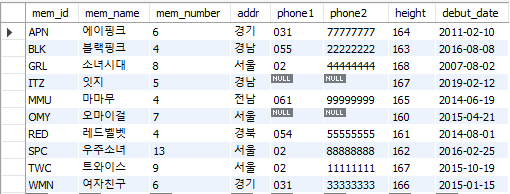

In [ ]:
# SELECT문에서 테이블 이름은 원칙적으로 데이터베이스_이름.테이블_이름 형식을 사용해야 하지만 대부분 테이블_이름만 사용한다
# 그 이유는, 데이터베이스 이름을 생략하면 USE 문으로 저장해놓은 데이터베이스가 자동으로 선택되기 때문이다.
# 현재 선택된 데이터베이스가 market_db이므로 두 쿼리는 동일한 것이 된다.
SELECT * FROM market_db.member;
SELECT * FROM member;

#### OUTPUT 패널의 의미
* 초록색 체크 표시: SQL이 정상적으로 실행되었다는 의미
* 빨강색 X 표시: SQL에 오류가 발생했다는 의미
* #: 실행한 SQL의 순번, 실행한 SQL이 여러 개라면 1, 2, 3,... 순서로 증가함
* Time: SQL을 실행한 시각이 표시
* Action: 실행된 SQL이 표시됨
* Message: SELECT 문이 조회된 행의 개수가 나옴, 만약 오류 발생 시에는 오류 번호 및 오류 메시지가 표시
* Duration/Fetch: Duration은 SQL문이 실행되는데 걸린 시간(초), Fetch는 데이터베이스에서 가져온 시간(초)입니다.

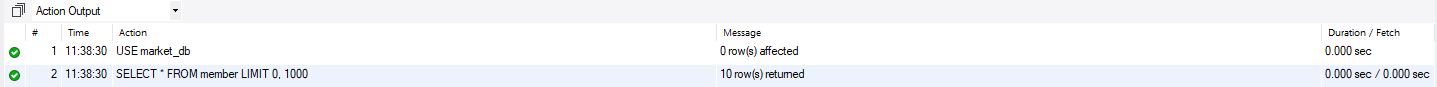

In [ ]:
# 회원 테이블의 이름열을 가져오기
SELECT mem_name FROM member;

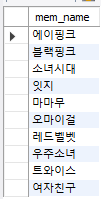

* 여러 개의 열을 가져오고 싶은면 콤마로 구분하면 된다. 열 이름의 순서는 원래 테이블을 만들때 순서에 맞출 필요 X
* 보고 싶은 순서대로 열을 나열하면 됨

In [ ]:
# 여러 열을 불러오기
SELECT addr, debut_date, mem_name FROM member;

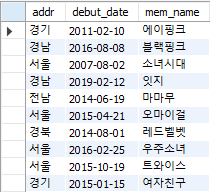

In [ ]:
# 열 이름에 별칭 지정
SELECT addr 주소, debut_date '데뷔 일자' , mem_name FROM member;

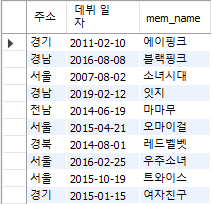

### WHERE절
* WHERE은 필요한 것들만 골라서 결과를 볼 수 있다.
* 조회하는 결과에 특정한 조건을 추가해서 원하는 데이터만 보고 싶을 때 사용
* SELECT 열_이름 FROM 테이블_이름 WHERE 조건식; 의 형태
* 다음과 같이 조건식을 사용하면 된다 -> '열_이름 = 값'은 열의 값에 해당하는 결과만 출력

In [ ]:
# 이름(mem_name)이 블랙핑크인 결과 출력
SELECT * FROM member WHERE mem_name = '블랙핑크';

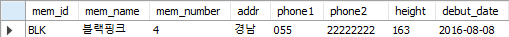

In [ ]:
# 인원이 4명인 회원 출력
SELECT * FROM member WHERE mem_number = 4;

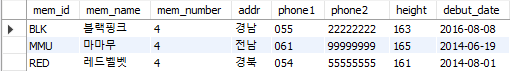

#### 관계 연산자, 논리 연산자 사용
* **관계 연산자**: WHERE절에서 크다/작다/같다 등을 지정하는 기호, <, <=, >, >=, = 등이 있다.
* **논리 연산자**: 관계 연산자가 2개 이상 나오면 AND, OR등으로 참/거짓 판별
    * AND연산자: 두 조건을 모두 만족
    * OR연산자: 둘 중 하나만 만족해도 됨

In [ ]:
# 평균 키가 162 이하인 회원 검색
SELECT mem_id, mem_name FROM member WHERE height <= 162;

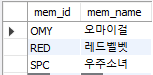

In [ ]:
# 두 가지 이상의 조건 검색 - 평균 키가 165이상이면서 인원도 6명 초과인 회원
# AND 연산자
SELECT mem_name, height, mem_number FROM member WHERE height > 165 AND mem_number > 6;

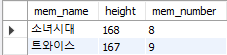

In [ ]:
# OR 연산자
SELECT mem_name, height, mem_number FROM member WHERE height > 165 OR mem_number > 6;

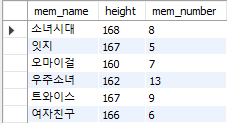

#### BETWEEN AND구문

In [ ]:
# AND를 사용하여 평균 키가 163에서 165인 회원 조회
SELECT mem_name, height 
FROM member 
WHERE height >= 163 AND height <= 165;

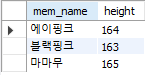

In [ ]:
# BETWEEN AND 구문 사용
# 숫자의 범위를 조건식에서 사용할 때는 BETWEEN ~ AND가 편리함
SELECT mem_name, height 
FROM member
WHERE height BETWEEN 163 AND 165;

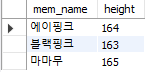

#### In()
* 주소(addr)와 같은 데이터는 문자로 표현되기 때문에 BETWEEN ~ AND의 사용이 불가능함
* 경기/전남/경남 중 한곳에 사는 회원을 검색하려면 OR로 일일이 지정해줘야 함
* In()은 이러한 불필요 과정을 제거하고 간결하게 작성 가능

In [ ]:
# OR를 사용하여 경기/전남/경남 중 한곳에 사는 회원을 검색
SELECT mem_name, addr
FROM member
WHERE addr = '경기' OR addr = '전남' OR addr = '경남';

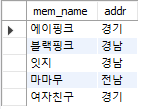

In [ ]:
# In()을 사용하여 경기/전남/경남 중 한곳에 사는 회원을 검색
# In을 사용하면 코드가 보다 간결해진다
SELECT mem_name, addr
FROM member
WHERE addr IN('경기', '전남', '경남');

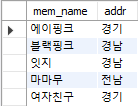

#### LIKE
* 문자열의 일부 글자를 검색할 때 사용
* '우%': 제일 앞글자가 '우'이고 그 뒤는 무엇이든 허용한다는 의미
* '%우': 앞에는 무엇이든 허용하고 마지막 글자가 '우'인 것을 검색
* '%우%': 중간에 '우'가 들어가는 것 검색
* 한 글자와 매칭하기 위해서는 언더바(_)사용, 이때 언더바 사용 개수는 매칭 글자를 제외한 글자의 수와 같아야 한다.
* 즉, 문자열 비교 시 모두 허용할 때는 %를, 하나로 지정할 때는 _를 사용한다.

In [ ]:
# LIKE를 사용하여 이름의 첫글자가 '우'로 시작하는 회원 검색
SELECT *
FROM member
WHERE mem_name LIKE '우%';

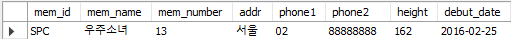

In [ ]:
SELECT *
FROM member
# 언더바 두개를 사용
WHERE mem_name LIKE '__핑크';

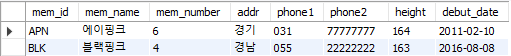

### 서브쿼리
* SELECT안에는 또 다른 SELECT가 들어갈 수 있는데 이것은 서브쿼리 또는 하위쿼리라고 한다.
* 보통 복잡한 SQL쿼리문에 사용된다.

In [ ]:
# 에이핑크의 평균키
SELECT height
FROM member
WHERE mem_name = '에이핑크';

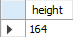

In [ ]:
# 키가 164보다 큰 회원 검색
SELECT mem_name, height
FROM member
WHERE height > 164;

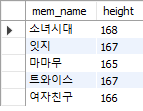

* SQL문 2개를 사용해서 결과를 얻었는데, 이것을 서브쿼리를 사용하여 하나의 SQL문으로 실행할 수 있다.

In [ ]:
# 서브쿼리를 사용하여 키가 164보다 큰 회원 검색
SELECT mem_name, height
FROM member
WHERE height > (SELECT height FROM member WHERE mem_name = '에이핑크');

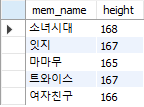

### 응용해서 연습해보기

In [ ]:
# 키가 165이상이고 멤버 수가 4명 이상인 회원
SELECT *
FROM member
WHERE height >= 165 AND mem_number >= 4;

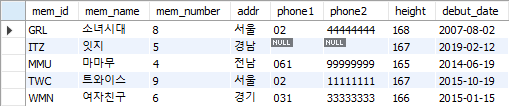

In [ ]:
# 그룹이름과 평균 키만 보고자 할 때
SELECT mem_name, height
FROM member
WHERE height >= 165 AND mem_number >= 4;

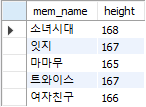

In [ ]:
# 그룹이 레드벨벳인 사람의 그룹명과 데뷔날짜 추출
SELECT mem_name, debut_date
FROM member
WHERE mem_name = '레드벨벳';

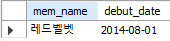

In [ ]:
# 데뷔날짜가 2013-12-31에서 2016-03-01사이인 회원
# 방법 1
SELECT *
FROM member
WHERE debut_date BETWEEN '2013-12-31' AND '2016-03-01';

# 방법 2
SELECT *
FROM member
WHERE debut_date > '2013-12-31' AND debut_date < '2016-03-01';

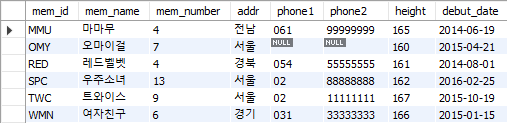

In [ ]:
# 주소가 서울이거나 경기인 회원
# 방법 1
SELECT *
FROM member
WHERE addr IN('서울', '경기');

# 방법 2
SELECT * 
FROM member 
WHERE addr = '서울' OR addr = '경기';

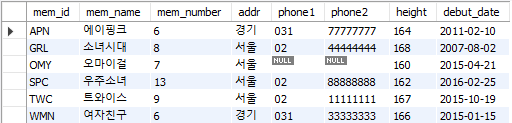

In [ ]:
# 그룹명 중간에 '이'가 들어가는 회원
SELECT *
FROM member
WHERE mem_name LIKE '%이%';

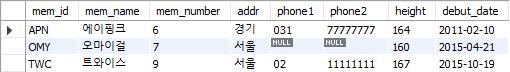

In [ ]:
# 그룹명이 '소'로 시작하는 회원
# 방법 1
SELECT *
FROM member
WHERE mem_name LIKE '소%';

# 방법 2
SELECT *
FROM member
WHERE mem_name LIKE '소녀__';

# 방법 3
SELECT *
FROM member
WHERE mem_name LIKE '소___';

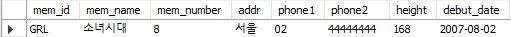

In [ ]:
# 그룹명이 '잇'으로 시작하는 회원
# 방법 1
SELECT * 
FROM member
WHERE mem_name LIKE '잇%';

# 방법 2
SELECT * 
FROM member
WHERE mem_name LIKE '잇_';

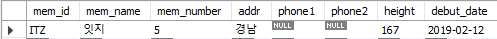